In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
os.chdir('C:/Users/rakim/Downloads/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records')
sample_data=pd.DataFrame()
data=pd.DataFrame()
list_data = os.listdir()
for file in list_data:
    
    try:
        # file path for the current file
        # file_path = os.path.join(os.getcwd(), file)
        data1 = pd.read_parquet(file)
        data1["tpep_pickup_datetime"]=pd.to_datetime(data1["tpep_pickup_datetime"])
        data1["hours"] = data1["tpep_pickup_datetime"].dt.hour
        for i in range(24):
            hour_data=data1[data1['hours']==i]
            hour_data=hour_data.sample(frac=0.01, random_state=42)
            sample_data=pd.concat([sample_data, hour_data])
        
    except Exception as e:
        print(f"Error reading file {file}: {e}")
    data=pd.concat([data, sample_data])

data.tail()





Error reading file trip_records.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hours,Airport_fee
1080279,2,2023-09-11 23:40:45,2023-09-12 00:10:27,1.0,17.96,2.0,N,132,229,1,...,0.0,0.5,10.00,6.94,1.0,92.69,2.5,NaN,23,1.75
1306849,2,2023-09-13 23:47:45,2023-09-13 23:54:35,2.0,0.82,1.0,N,158,249,1,...,1.0,0.5,2.58,0.00,1.0,15.48,2.5,NaN,23,0.00
2701529,1,2023-09-30 23:04:57,2023-09-30 23:23:25,1.0,2.70,1.0,N,229,148,2,...,3.5,0.5,0.00,0.00,1.0,22.70,2.5,NaN,23,0.00
1307135,2,2023-09-13 23:05:39,2023-09-13 23:11:03,1.0,1.00,1.0,N,164,162,1,...,1.0,0.5,1.00,0.00,1.0,13.20,2.5,NaN,23,0.00
408219,2,2023-09-05 23:01:21,2023-09-05 23:06:35,1.0,0.89,1.0,N,113,79,1,...,1.0,0.5,2.44,0.00,1.0,14.64,2.5,NaN,23,0.00


In [4]:
data.to_csv("trip_records.csv")

In [5]:
df=pd.read_csv("trip_records.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hours,Airport_fee
0,2,2023-01-10 00:44:09,2023-01-10 00:51:23,1.0,1.97,1.0,N,142,164,1,...,1.00,0.5,3.14,0.00,1.0,18.84,2.5,0.00,0,NaN
1,1,2023-01-15 00:32:10,2023-01-15 00:42:27,1.0,1.50,1.0,N,113,79,1,...,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.00,0,NaN
2,1,2023-01-29 00:29:35,2023-01-29 00:42:50,2.0,2.60,1.0,N,263,143,1,...,3.50,0.5,4.10,0.00,1.0,24.70,2.5,0.00,0,NaN
3,2,2023-01-14 00:14:30,2023-01-14 00:27:04,1.0,1.79,1.0,N,79,158,1,...,1.00,0.5,1.48,0.00,1.0,19.98,2.5,0.00,0,NaN
4,2,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,2,...,1.00,0.5,0.00,0.00,1.0,19.35,0.0,1.25,0,NaN
5,2,2023-01-17 00:46:57,2023-01-17 00:51:21,1.0,1.34,1.0,N,170,162,2,...,1.00,0.5,0.00,0.00,1.0,12.90,2.5,0.00,0,NaN
6,2,2023-01-01 00:05:41,2023-01-01 00:21:21,1.0,1.79,1.0,N,239,50,1,...,1.00,0.5,4.12,0.00,1.0,24.72,2.5,0.00,0,NaN
7,1,2023-01-13 00:59:41,2023-01-13 01:37:23,1.0,20.80,2.0,N,132,262,1,...,3.75,0.5,12.00,6.55,1.0,93.80,2.5,1.25,0,NaN
8,2,2023-01-22 00:57:00,2023-01-22 01:08:14,1.0,2.25,1.0,N,148,170,1,...,1.00,0.5,3.70,0.00,1.0,22.20,2.5,0.00,0,NaN
9,2,2023-01-01 00:10:59,2023-01-01 00:24:24,1.0,1.44,1.0,N,234,79,1,...,1.00,0.5,3.70,0.00,1.0,22.20,2.5,0.00,0,NaN


In [6]:
df.tail(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hours,Airport_fee
2889711,2,2023-09-30 23:45:51,2023-10-01 00:21:43,4.0,17.11,2.0,N,132,186,1,...,0.0,0.5,16.19,6.94,1.0,98.88,2.5,NaN,23,1.75
2889712,2,2023-09-17 23:32:25,2023-09-18 00:03:46,1.0,16.76,2.0,N,132,162,1,...,0.0,0.5,16.19,6.94,1.0,98.88,2.5,NaN,23,1.75
2889713,2,2023-09-11 23:36:00,2023-09-12 00:07:28,2.0,17.67,2.0,N,132,48,1,...,0.0,0.5,16.19,6.94,1.0,98.88,2.5,NaN,23,1.75
2889714,2,2023-09-29 23:43:20,2023-09-29 23:59:09,1.0,5.79,1.0,N,88,227,1,...,1.0,0.5,7.47,6.94,1.0,44.81,2.5,NaN,23,0.00
2889715,2,2023-09-30 23:34:25,2023-09-30 23:49:35,1.0,1.99,1.0,N,114,164,1,...,1.0,0.5,4.12,0.00,1.0,24.72,2.5,NaN,23,0.00
2889716,1,2023-09-18 23:11:30,2023-09-18 23:26:12,1.0,3.80,1.0,N,75,234,1,...,3.5,0.5,1.00,0.00,1.0,25.10,2.5,NaN,23,0.00
2889717,2,2023-09-16 23:00:59,2023-09-16 23:03:00,1.0,0.18,1.0,N,211,144,1,...,1.0,0.5,0.00,0.00,1.0,8.70,2.5,NaN,23,0.00
2889718,2,2023-09-17 23:59:50,2023-09-18 00:28:25,1.0,19.48,2.0,N,132,211,1,...,0.0,0.5,15.15,0.00,1.0,90.90,2.5,NaN,23,1.75
2889719,2,2023-09-28 23:18:19,2023-09-28 23:27:32,2.0,1.42,1.0,N,230,229,2,...,1.0,0.5,0.00,0.00,1.0,15.70,2.5,NaN,23,0.00
2889720,2,2023-09-16 23:14:08,2023-09-16 23:23:46,1.0,2.79,1.0,N,48,151,1,...,1.0,0.5,3.84,0.00,1.0,23.04,2.5,NaN,23,0.00


In [7]:
df['tolls_amount'].value_counts()

tolls_amount
0.00     2654679
6.55      114928
6.94      100140
12.75       2964
14.75       2703
          ...   
18.05          2
34.69          2
20.74          2
25.17          2
23.19          2
Name: count, Length: 328, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889731 entries, 0 to 2889730
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  hours                  int64  
 20  Airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 463.

In [9]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count           101432
trip_distance                  0
RatecodeID                101432
store_and_fwd_flag        101432
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge      101432
airport_fee              2503475
hours                          0
Airport_fee               487688
dtype: int64

In [10]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

airport_fee              86.633496
Airport_fee              16.876588
passenger_count           3.510085
RatecodeID                3.510085
store_and_fwd_flag        3.510085
congestion_surcharge      3.510085
mta_tax                   0.000000
hours                     0.000000
total_amount              0.000000
improvement_surcharge     0.000000
tolls_amount              0.000000
tip_amount                0.000000
VendorID                  0.000000
extra                     0.000000
tpep_pickup_datetime      0.000000
payment_type              0.000000
DOLocationID              0.000000
PULocationID              0.000000
trip_distance             0.000000
tpep_dropoff_datetime     0.000000
fare_amount               0.000000
dtype: float64

In [11]:
df.drop(['hours','VendorID'],axis=1, inplace=True)

In [12]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2023-01-10 00:44:09,2023-01-10 00:51:23,1.0,1.97,1.0,N,142,164,1,10.7,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.00,NaN
1,2023-01-15 00:32:10,2023-01-15 00:42:27,1.0,1.50,1.0,N,113,79,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00,NaN
2,2023-01-29 00:29:35,2023-01-29 00:42:50,2.0,2.60,1.0,N,263,143,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00,NaN
3,2023-01-14 00:14:30,2023-01-14 00:27:04,1.0,1.79,1.0,N,79,158,1,13.5,1.0,0.5,1.48,0.0,1.0,19.98,2.5,0.00,NaN
4,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,2,15.6,1.0,0.5,0.00,0.0,1.0,19.35,0.0,1.25,NaN


In [13]:
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])


df.head(10)
            

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2023-01-10 00:44:09,2023-01-10 00:51:23,1.0,1.97,1.0,N,142,164,1,10.7,1.00,0.5,3.14,0.00,1.0,18.84,2.5,0.00,0.00
1,2023-01-15 00:32:10,2023-01-15 00:42:27,1.0,1.50,1.0,N,113,79,1,10.0,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.00,0.00
2,2023-01-29 00:29:35,2023-01-29 00:42:50,2.0,2.60,1.0,N,263,143,1,15.6,3.50,0.5,4.10,0.00,1.0,24.70,2.5,0.00,0.00
3,2023-01-14 00:14:30,2023-01-14 00:27:04,1.0,1.79,1.0,N,79,158,1,13.5,1.00,0.5,1.48,0.00,1.0,19.98,2.5,0.00,0.00
4,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,2,15.6,1.00,0.5,0.00,0.00,1.0,19.35,0.0,1.25,1.25
5,2023-01-17 00:46:57,2023-01-17 00:51:21,1.0,1.34,1.0,N,170,162,2,7.9,1.00,0.5,0.00,0.00,1.0,12.90,2.5,0.00,0.00
6,2023-01-01 00:05:41,2023-01-01 00:21:21,1.0,1.79,1.0,N,239,50,1,15.6,1.00,0.5,4.12,0.00,1.0,24.72,2.5,0.00,0.00
7,2023-01-13 00:59:41,2023-01-13 01:37:23,1.0,20.80,2.0,N,132,262,1,70.0,3.75,0.5,12.00,6.55,1.0,93.80,2.5,1.25,1.25
8,2023-01-22 00:57:00,2023-01-22 01:08:14,1.0,2.25,1.0,N,148,170,1,13.5,1.00,0.5,3.70,0.00,1.0,22.20,2.5,0.00,0.00
9,2023-01-01 00:10:59,2023-01-01 00:24:24,1.0,1.44,1.0,N,234,79,1,13.5,1.00,0.5,3.70,0.00,1.0,22.20,2.5,0.00,0.00


In [14]:
df.tail(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
2889721,2023-09-06 23:47:58,2023-09-07 00:35:41,1.0,19.98,2.0,N,132,229,1,70.0,0.0,0.5,16.19,6.94,1.0,98.88,2.5,1.75,1.75
2889722,2023-09-01 23:40:16,2023-09-01 23:50:32,1.0,1.65,1.0,N,230,229,1,10.7,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.00,0.00
2889723,2023-09-30 23:37:07,2023-09-30 23:48:10,1.0,2.18,1.0,N,79,229,1,12.8,1.0,0.5,3.56,0.00,1.0,21.36,2.5,0.00,0.00
2889724,2023-09-29 23:13:50,2023-09-29 23:21:38,1.0,1.81,1.0,N,48,68,1,10.0,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.00,0.00
2889725,2023-09-30 23:42:01,2023-09-30 23:57:39,1.0,1.86,1.0,N,68,143,1,15.6,1.0,0.5,5.15,0.00,1.0,25.75,2.5,0.00,0.00
2889726,2023-09-11 23:40:45,2023-09-12 00:10:27,1.0,17.96,2.0,N,132,229,1,70.0,0.0,0.5,10.00,6.94,1.0,92.69,2.5,1.75,1.75
2889727,2023-09-13 23:47:45,2023-09-13 23:54:35,2.0,0.82,1.0,N,158,249,1,7.9,1.0,0.5,2.58,0.00,1.0,15.48,2.5,0.00,0.00
2889728,2023-09-30 23:04:57,2023-09-30 23:23:25,1.0,2.70,1.0,N,229,148,2,17.7,3.5,0.5,0.00,0.00,1.0,22.70,2.5,0.00,0.00
2889729,2023-09-13 23:05:39,2023-09-13 23:11:03,1.0,1.00,1.0,N,164,162,1,7.2,1.0,0.5,1.00,0.00,1.0,13.20,2.5,0.00,0.00
2889730,2023-09-05 23:01:21,2023-09-05 23:06:35,1.0,0.89,1.0,N,113,79,1,7.2,1.0,0.5,2.44,0.00,1.0,14.64,2.5,0.00,0.00


In [15]:
df.drop('Airport_fee', axis=1, inplace=True)
df.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2023-01-10 00:44:09,2023-01-10 00:51:23,1.0,1.97,1.0,N,142,164,1,10.7,1.00,0.5,3.14,0.00,1.0,18.84,2.5,0.00
1,2023-01-15 00:32:10,2023-01-15 00:42:27,1.0,1.50,1.0,N,113,79,1,10.0,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.00
2,2023-01-29 00:29:35,2023-01-29 00:42:50,2.0,2.60,1.0,N,263,143,1,15.6,3.50,0.5,4.10,0.00,1.0,24.70,2.5,0.00
3,2023-01-14 00:14:30,2023-01-14 00:27:04,1.0,1.79,1.0,N,79,158,1,13.5,1.00,0.5,1.48,0.00,1.0,19.98,2.5,0.00
4,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,2,15.6,1.00,0.5,0.00,0.00,1.0,19.35,0.0,1.25
5,2023-01-17 00:46:57,2023-01-17 00:51:21,1.0,1.34,1.0,N,170,162,2,7.9,1.00,0.5,0.00,0.00,1.0,12.90,2.5,0.00
6,2023-01-01 00:05:41,2023-01-01 00:21:21,1.0,1.79,1.0,N,239,50,1,15.6,1.00,0.5,4.12,0.00,1.0,24.72,2.5,0.00
7,2023-01-13 00:59:41,2023-01-13 01:37:23,1.0,20.80,2.0,N,132,262,1,70.0,3.75,0.5,12.00,6.55,1.0,93.80,2.5,1.25
8,2023-01-22 00:57:00,2023-01-22 01:08:14,1.0,2.25,1.0,N,148,170,1,13.5,1.00,0.5,3.70,0.00,1.0,22.20,2.5,0.00
9,2023-01-01 00:10:59,2023-01-01 00:24:24,1.0,1.44,1.0,N,234,79,1,13.5,1.00,0.5,3.70,0.00,1.0,22.20,2.5,0.00


In [16]:
(df['extra']<0).value_counts()

extra
False    2889697
True          34
Name: count, dtype: int64

In [17]:
df[df['extra']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
92501,2023-10-06 22:24:42,2023-10-06 22:25:38,2.0,0.03,1.0,N,161,161,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0
157769,2023-10-06 22:24:42,2023-10-06 22:25:38,2.0,0.03,1.0,N,161,161,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0
181264,2023-11-05 17:48:11,2023-11-05 17:48:19,1.0,0.00,1.0,N,107,234,2,3.0,-2.5,0.5,0.0,0.0,1.0,7.0,2.5,0.0
192613,2023-11-06 22:37:04,2023-11-06 22:37:55,1.0,0.03,1.0,N,229,229,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0
256067,2023-10-06 22:24:42,2023-10-06 22:25:38,2.0,0.03,1.0,N,161,161,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0
279562,2023-11-05 17:48:11,2023-11-05 17:48:19,1.0,0.00,1.0,N,107,234,2,3.0,-2.5,0.5,0.0,0.0,1.0,7.0,2.5,0.0
290911,2023-11-06 22:37:04,2023-11-06 22:37:55,1.0,0.03,1.0,N,229,229,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0
387704,2023-10-06 22:24:42,2023-10-06 22:25:38,2.0,0.03,1.0,N,161,161,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0
411199,2023-11-05 17:48:11,2023-11-05 17:48:19,1.0,0.00,1.0,N,107,234,2,3.0,-2.5,0.5,0.0,0.0,1.0,7.0,2.5,0.0
422548,2023-11-06 22:37:04,2023-11-06 22:37:55,1.0,0.03,1.0,N,229,229,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0


In [18]:
df['extra'][df['extra']<0]=df['extra']*(-1)
df[df['extra']<0]

C:\Users\rakim\AppData\Local\Temp\ipykernel_22964\1012103667.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['extra'][df['extra']<0]=df['extra']*(-1)
C:\Users\rakim\AppData\Local\Temp\ipykernel_22964\1012103667.py:1: SettingWithCopyWa

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [19]:
(df['extra']<0).value_counts()

extra
False    2889731
Name: count, dtype: int64

In [20]:
df['mta_tax'][df['mta_tax']<0]=df['mta_tax']*(-1)
df['tip_amount'][df['tip_amount']<0]=df['tip_amount']*(-1)
df['tolls_amount'][df['tolls_amount']<0]=df['tolls_amount']*(-1)
df['improvement_surcharge'][df['improvement_surcharge']<0]=df['improvement_surcharge']*(-1)
df['total_amount'][df['total_amount']<0]=df['total_amount']*(-1)
df['congestion_surcharge'][df['congestion_surcharge']<0]=df['congestion_surcharge']*(-1)



C:\Users\rakim\AppData\Local\Temp\ipykernel_22964\1516742633.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['mta_tax'][df['mta_tax']<0]=df['mta_tax']*(-1)
C:\Users\rakim\AppData\Local\Temp\ipykernel_22964\1516742633.py:1: SettingWith

In [21]:
(df['mta_tax']<0).value_counts()

mta_tax
False    2889731
Name: count, dtype: int64

In [22]:
(df['tip_amount']<0).value_counts()

tip_amount
False    2889731
Name: count, dtype: int64

In [23]:
(df['tolls_amount']<0).value_counts()

tolls_amount
False    2889731
Name: count, dtype: int64

In [24]:
(df['improvement_surcharge']<0).value_counts()

improvement_surcharge
False    2889731
Name: count, dtype: int64

In [25]:
(df['total_amount']<0).value_counts()

total_amount
False    2889731
Name: count, dtype: int64

In [26]:
(df['congestion_surcharge']<0).value_counts()

congestion_surcharge
False    2889731
Name: count, dtype: int64

In [27]:
(df['RatecodeID']<0).value_counts()

RatecodeID
False    2889731
Name: count, dtype: int64

In [28]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

airport_fee              3.510085
passenger_count          3.510085
congestion_surcharge     3.510085
RatecodeID               3.510085
store_and_fwd_flag       3.510085
mta_tax                  0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
tpep_pickup_datetime     0.000000
extra                    0.000000
tpep_dropoff_datetime    0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
fare_amount              0.000000
dtype: float64

In [29]:
df[df['passenger_count'].isnull()]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
82,2023-01-22 00:14:14,2023-01-22 00:37:33,NaN,7.98,NaN,NaN,148,239,0,39.42,0.0,0.5,8.68,0.00,1.0,52.10,NaN,NaN
92,2023-01-01 00:32:00,2023-01-01 01:07:00,NaN,4.48,NaN,NaN,143,52,0,41.54,0.0,0.5,3.00,0.00,1.0,48.54,NaN,NaN
94,2023-01-15 00:05:36,2023-01-15 00:25:48,NaN,0.00,NaN,NaN,263,13,0,22.67,0.0,0.5,0.00,0.00,1.0,26.67,NaN,NaN
109,2023-01-28 00:21:00,2023-01-28 00:29:00,NaN,2.72,NaN,NaN,263,233,0,17.77,0.0,0.5,4.35,0.00,1.0,26.12,NaN,NaN
170,2023-01-08 00:36:00,2023-01-08 01:02:00,NaN,5.70,NaN,NaN,79,36,0,30.51,0.0,0.5,6.90,0.00,1.0,41.41,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889669,2023-09-08 23:19:04,2023-09-08 23:28:56,NaN,0.00,NaN,NaN,114,125,0,12.52,0.0,0.5,0.00,0.00,1.0,16.52,NaN,NaN
2889680,2023-09-22 23:51:00,2023-09-23 00:13:00,NaN,4.88,NaN,NaN,137,179,0,25.39,0.0,0.5,3.00,6.94,1.0,39.33,NaN,NaN
2889689,2023-09-12 23:13:47,2023-09-12 23:28:31,NaN,0.00,NaN,NaN,79,90,0,15.35,0.0,0.5,0.00,0.00,1.0,19.35,NaN,NaN
2889695,2023-09-23 23:57:32,2023-09-24 00:07:45,NaN,1.56,NaN,NaN,79,137,0,14.48,0.0,0.5,0.92,0.00,1.0,19.40,NaN,NaN


In [30]:
df['passenger_count']=df['passenger_count'].fillna(df['passenger_count'].mode()[0])

In [31]:
df[df['passenger_count'].isnull()]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [32]:
df[df['passenger_count']==0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
24,2023-01-06 00:32:36,2023-01-06 00:39:39,0.0,1.2,1.0,N,237,163,2,8.6,3.50,0.5,0.00,0.0,1.0,13.60,2.5,0.00
477,2023-01-11 00:04:36,2023-01-11 00:09:20,0.0,1.0,1.0,N,100,90,2,7.2,3.50,0.5,0.00,0.0,1.0,12.20,2.5,0.00
485,2023-01-14 00:19:10,2023-01-14 00:49:04,0.0,10.0,1.0,N,132,35,1,43.6,2.25,0.5,10.00,0.0,1.0,57.35,0.0,1.25
650,2023-01-07 00:46:49,2023-01-07 00:56:48,0.0,1.8,1.0,N,249,170,2,12.1,3.50,0.5,0.00,0.0,1.0,17.10,2.5,0.00
759,2023-01-14 00:56:26,2023-01-14 01:02:22,0.0,1.4,1.0,N,79,137,1,8.6,3.50,0.5,2.70,0.0,1.0,16.30,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889285,2023-09-14 23:27:43,2023-09-14 23:31:24,0.0,0.6,1.0,N,211,125,1,5.8,3.50,0.5,2.00,0.0,1.0,12.80,2.5,0.00
2889294,2023-09-13 23:09:30,2023-09-13 23:15:32,0.0,1.3,1.0,Y,237,238,1,8.6,3.50,0.5,2.70,0.0,1.0,16.30,2.5,0.00
2889440,2023-09-28 23:42:44,2023-09-29 00:11:41,0.0,4.7,1.0,N,142,107,1,27.5,3.50,0.5,5.00,0.0,1.0,37.50,2.5,0.00
2889460,2023-09-01 23:11:43,2023-09-01 23:21:41,0.0,1.8,1.0,N,170,114,1,12.1,3.50,0.5,0.03,0.0,1.0,17.13,2.5,0.00


In [33]:
df['passenger_count'].unique()

array([1., 2., 3., 0., 4., 5., 6., 8.])

In [34]:
# df[['fare_amount','tip_amount','tolls_amount','mta_tax','extra','improvement_surcharge']].sum(axis=1)

df[df['passenger_count']==0]=1



df[df['passenger_count']==0]
 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [35]:
df['passenger_count'].unique()

array([1., 2., 3., 4., 5., 6., 8.])

In [36]:
df[df['passenger_count'].isnull()]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [37]:
df[df['RatecodeID'].isnull()]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
82,2023-01-22 00:14:14,2023-01-22 00:37:33,1.0,7.98,NaN,NaN,148,239,0,39.42,0.0,0.5,8.68,0.00,1.0,52.10,NaN,NaN
92,2023-01-01 00:32:00,2023-01-01 01:07:00,1.0,4.48,NaN,NaN,143,52,0,41.54,0.0,0.5,3.00,0.00,1.0,48.54,NaN,NaN
94,2023-01-15 00:05:36,2023-01-15 00:25:48,1.0,0.00,NaN,NaN,263,13,0,22.67,0.0,0.5,0.00,0.00,1.0,26.67,NaN,NaN
109,2023-01-28 00:21:00,2023-01-28 00:29:00,1.0,2.72,NaN,NaN,263,233,0,17.77,0.0,0.5,4.35,0.00,1.0,26.12,NaN,NaN
170,2023-01-08 00:36:00,2023-01-08 01:02:00,1.0,5.70,NaN,NaN,79,36,0,30.51,0.0,0.5,6.90,0.00,1.0,41.41,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889669,2023-09-08 23:19:04,2023-09-08 23:28:56,1.0,0.00,NaN,NaN,114,125,0,12.52,0.0,0.5,0.00,0.00,1.0,16.52,NaN,NaN
2889680,2023-09-22 23:51:00,2023-09-23 00:13:00,1.0,4.88,NaN,NaN,137,179,0,25.39,0.0,0.5,3.00,6.94,1.0,39.33,NaN,NaN
2889689,2023-09-12 23:13:47,2023-09-12 23:28:31,1.0,0.00,NaN,NaN,79,90,0,15.35,0.0,0.5,0.00,0.00,1.0,19.35,NaN,NaN
2889695,2023-09-23 23:57:32,2023-09-24 00:07:45,1.0,1.56,NaN,NaN,79,137,0,14.48,0.0,0.5,0.92,0.00,1.0,19.40,NaN,NaN


In [38]:
df['RatecodeID'].unique()

array([ 1.,  2.,  3.,  4., nan,  5., 99.])

In [39]:
df['RatecodeID']=df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

In [40]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     2735358
2.0      107687
99.0      16148
5.0       15625
3.0        9012
4.0        5901
Name: count, dtype: int64

In [41]:
df['RatecodeID'].unique()

array([ 1.,  2.,  3.,  4.,  5., 99.])

In [42]:
df[df['congestion_surcharge'].isnull()]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
82,2023-01-22 00:14:14,2023-01-22 00:37:33,1.0,7.98,1.0,NaN,148,239,0,39.42,0.0,0.5,8.68,0.00,1.0,52.10,NaN,NaN
92,2023-01-01 00:32:00,2023-01-01 01:07:00,1.0,4.48,1.0,NaN,143,52,0,41.54,0.0,0.5,3.00,0.00,1.0,48.54,NaN,NaN
94,2023-01-15 00:05:36,2023-01-15 00:25:48,1.0,0.00,1.0,NaN,263,13,0,22.67,0.0,0.5,0.00,0.00,1.0,26.67,NaN,NaN
109,2023-01-28 00:21:00,2023-01-28 00:29:00,1.0,2.72,1.0,NaN,263,233,0,17.77,0.0,0.5,4.35,0.00,1.0,26.12,NaN,NaN
170,2023-01-08 00:36:00,2023-01-08 01:02:00,1.0,5.70,1.0,NaN,79,36,0,30.51,0.0,0.5,6.90,0.00,1.0,41.41,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889669,2023-09-08 23:19:04,2023-09-08 23:28:56,1.0,0.00,1.0,NaN,114,125,0,12.52,0.0,0.5,0.00,0.00,1.0,16.52,NaN,NaN
2889680,2023-09-22 23:51:00,2023-09-23 00:13:00,1.0,4.88,1.0,NaN,137,179,0,25.39,0.0,0.5,3.00,6.94,1.0,39.33,NaN,NaN
2889689,2023-09-12 23:13:47,2023-09-12 23:28:31,1.0,0.00,1.0,NaN,79,90,0,15.35,0.0,0.5,0.00,0.00,1.0,19.35,NaN,NaN
2889695,2023-09-23 23:57:32,2023-09-24 00:07:45,1.0,1.56,1.0,NaN,79,137,0,14.48,0.0,0.5,0.92,0.00,1.0,19.40,NaN,NaN


In [43]:
df['congestion_surcharge'].unique()

array([2.5, 0. , 1. , nan])

In [44]:
df.dropna(how='any',axis=0, inplace=True) 


In [45]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
congestion_surcharge     0.0
total_amount             0.0
improvement_surcharge    0.0
tolls_amount             0.0
tip_amount               0.0
mta_tax                  0.0
extra                    0.0
fare_amount              0.0
payment_type             0.0
DOLocationID             0.0
PULocationID             0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
trip_distance            0.0
passenger_count          0.0
airport_fee              0.0
dtype: float64

<Axes: >

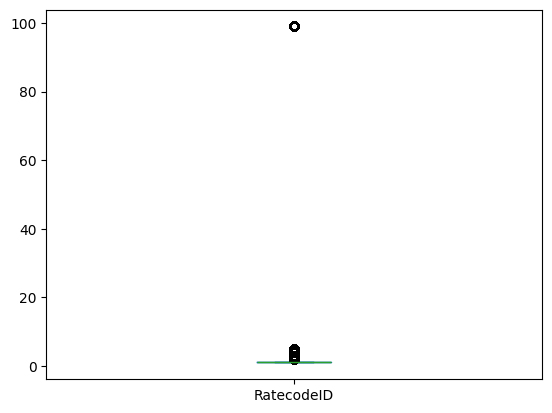

In [46]:
df['RatecodeID'].plot.box()

<Axes: >

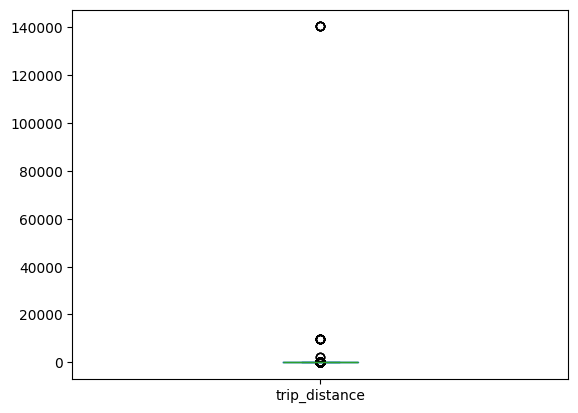

In [47]:
df['trip_distance'].plot.box()

<Axes: >

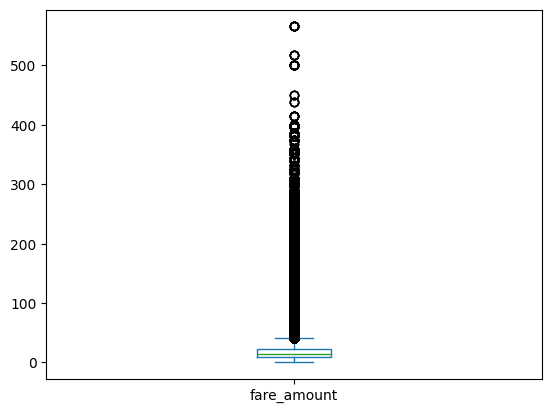

In [48]:
df['fare_amount'].plot.box()

In [49]:
df.drop(df[(df['trip_distance']==0) & (df['fare_amount']>300)].index, inplace=True)

In [50]:
df[(df['trip_distance']==0) & (df['fare_amount']>300)]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [51]:
df.drop(df[(df['trip_distance']==0) & (df['fare_amount']==0) &(df['PULocationID']!=df['DOLocationID'])].index, inplace=True)

In [ ]:
df.drop(df[(df['trip_distance']==0) & (df['fare_amount']==0) &(df['PULocationID']!=df['DOLocationID'])].index, inplace=True)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [53]:
df[df['trip_distance']>250]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
899402,2023-08-23 14:20:54,2023-08-23 14:49:24,1.0,140385.20,99.0,N,76,265,1,21.5,0.0,0.5,0.00,0.0,1.0,23.00,0.0,0.0
1125465,2023-08-23 14:20:54,2023-08-23 14:49:24,1.0,140385.20,99.0,N,76,265,1,21.5,0.0,0.5,0.00,0.0,1.0,23.00,0.0,0.0
1380422,2023-08-23 14:20:54,2023-08-23 14:49:24,1.0,140385.20,99.0,N,76,265,1,21.5,0.0,0.5,0.00,0.0,1.0,23.00,0.0,0.0
1448694,2023-04-14 18:32:39,2023-04-14 19:26:47,3.0,9683.85,1.0,N,132,181,1,94.7,2.5,0.5,0.00,0.0,1.0,98.70,0.0,0.0
1667961,2023-08-23 14:20:54,2023-08-23 14:49:24,1.0,140385.20,99.0,N,76,265,1,21.5,0.0,0.5,0.00,0.0,1.0,23.00,0.0,0.0
1736233,2023-04-14 18:32:39,2023-04-14 19:26:47,3.0,9683.85,1.0,N,132,181,1,94.7,2.5,0.5,0.00,0.0,1.0,98.70,0.0,0.0
1757435,2023-05-10 13:56:31,2023-05-10 14:30:23,1.0,9674.20,1.0,N,186,48,2,19.1,0.0,0.5,0.00,0.0,1.0,23.10,2.5,0.0
1763354,2023-05-19 15:46:10,2023-05-19 16:00:52,1.0,9673.95,1.0,N,68,234,2,14.2,0.0,0.5,0.00,0.0,1.0,18.20,2.5,0.0
1990316,2023-08-23 14:20:54,2023-08-23 14:49:24,1.0,140385.20,99.0,N,76,265,1,21.5,0.0,0.5,0.00,0.0,1.0,23.00,0.0,0.0
2058588,2023-04-14 18:32:39,2023-04-14 19:26:47,3.0,9683.85,1.0,N,132,181,1,94.7,2.5,0.5,0.00,0.0,1.0,98.70,0.0,0.0


In [54]:
df.drop(df[df['trip_distance']>250].index, inplace=True)

In [55]:
df[df['trip_distance']>250]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [56]:
df['payment_type'].unique()

array([1, 2, 4, 3], dtype=int64)

In [57]:
df['RatecodeID'].unique()

array([ 1.,  2.,  3.,  4.,  5., 99.])

In [58]:
df[df['RatecodeID']>5]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2215,2023-01-11 04:23:47,2023-01-11 04:41:59,1.0,10.8,99.0,N,14,137,1,59.5,0.0,0.5,0.0,0.00,1.0,61.00,0.0,0.0
2219,2023-01-09 04:25:29,2023-01-09 05:17:53,1.0,11.6,99.0,N,76,123,1,39.5,0.0,0.5,0.0,0.00,1.0,41.00,0.0,0.0
2294,2023-01-09 05:32:46,2023-01-09 06:05:09,1.0,0.0,99.0,N,51,88,1,52.5,0.0,0.5,0.0,6.55,1.0,60.55,0.0,0.0
2372,2023-01-26 05:59:44,2023-01-26 06:46:42,1.0,12.6,99.0,N,131,181,1,41.5,0.0,0.5,0.0,0.00,1.0,43.00,0.0,0.0
2407,2023-01-11 05:03:04,2023-01-11 05:14:03,1.0,1.2,99.0,N,168,74,1,16.5,0.0,0.5,0.0,0.00,1.0,18.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883421,2023-09-01 19:11:10,2023-09-01 19:27:23,1.0,2.4,99.0,N,122,130,1,19.5,0.0,0.5,0.0,0.00,1.0,21.00,0.0,0.0
2883676,2023-09-25 19:48:00,2023-09-25 20:06:26,1.0,7.3,99.0,N,74,32,1,31.5,0.0,0.5,0.0,0.00,1.0,33.00,0.0,0.0
2886732,2023-09-07 21:45:00,2023-09-07 21:50:09,1.0,6.3,99.0,N,247,229,1,31.5,0.0,0.5,0.0,0.00,1.0,33.00,0.0,0.0
2887211,2023-09-04 22:31:04,2023-09-04 23:46:40,1.0,15.4,99.0,N,191,89,1,50.5,0.0,0.5,0.0,0.00,1.0,52.00,0.0,0.0


In [59]:
df.drop(df[df['RatecodeID']>5].index,inplace=True)

In [60]:
df['RatecodeID'].unique()

array([1., 2., 3., 4., 5.])

In [61]:
df[df['RatecodeID']>5]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [62]:
df['passenger_count'].unique()

array([1., 2., 3., 4., 5., 6., 8.])

In [63]:
df.drop(df[df['passenger_count']>6].index,inplace=True)

In [64]:
df['passenger_count'].unique()

array([1., 2., 3., 4., 5., 6.])

# EDA

## the categorical variable are as followed

* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:






## and the numerical variable are as followed

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

## let us extract hours and days and months from 'tpep_pickup_datatime'

In [65]:
df['hours']=df['tpep_pickup_datetime'].astype(str).apply(lambda x: x[11:13])
df['days']=df['tpep_pickup_datetime'].astype(str).apply(lambda x: x[8:10])
df['months']=df['tpep_pickup_datetime'].astype(str).apply(lambda x: x[5:7])

df['hours']=pd.to_numeric(df['hours'])
df['days']=pd.to_numeric(df['days'])
df['months']=pd.to_numeric(df['months'])
df.head()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hours,days,months
0,2023-01-10 00:44:09,2023-01-10 00:51:23,1.0,1.97,1.0,N,142,164,1,10.7,...,0.5,3.14,0.0,1.0,18.84,2.5,0.00,0.0,10.0,1.0
1,2023-01-15 00:32:10,2023-01-15 00:42:27,1.0,1.50,1.0,N,113,79,1,10.0,...,0.5,2.00,0.0,1.0,17.00,2.5,0.00,0.0,15.0,1.0
2,2023-01-29 00:29:35,2023-01-29 00:42:50,2.0,2.60,1.0,N,263,143,1,15.6,...,0.5,4.10,0.0,1.0,24.70,2.5,0.00,0.0,29.0,1.0
3,2023-01-14 00:14:30,2023-01-14 00:27:04,1.0,1.79,1.0,N,79,158,1,13.5,...,0.5,1.48,0.0,1.0,19.98,2.5,0.00,0.0,14.0,1.0
4,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,2,15.6,...,0.5,0.00,0.0,1.0,19.35,0.0,1.25,0.0,3.0,1.0


<Axes: xlabel='hours', ylabel='total_amount'>

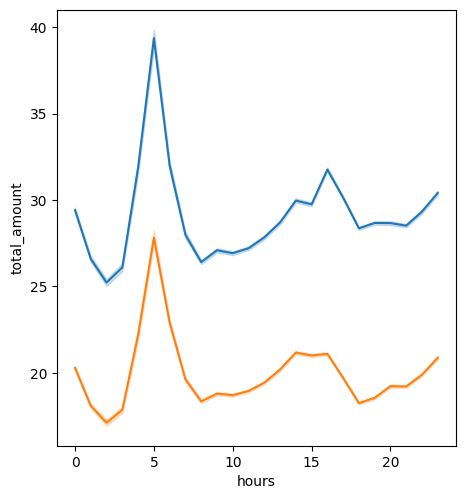

In [66]:
plt.figure(figsize=(7*1.618,3.5*1.618))
plt.subplot(1,2,1)
sns.lineplot(data=df,x='hours',y='total_amount')
sns.lineplot(data=df,x='hours',y='fare_amount')




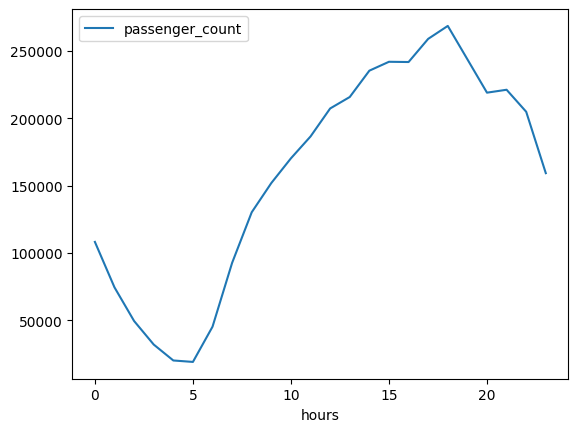

In [67]:
df.pivot_table(index='hours',values='passenger_count',aggfunc='sum').plot()
plt.show()


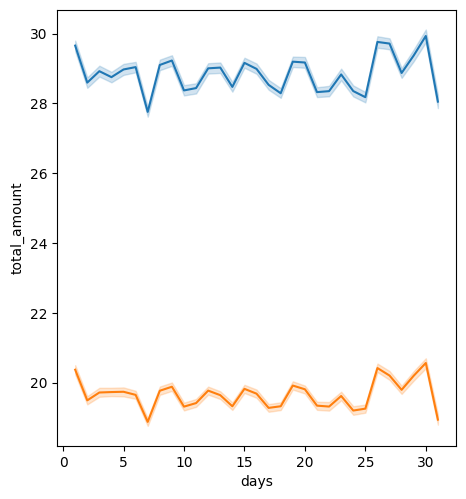

In [68]:
plt.figure(figsize=(7*1.618,3.5*1.618))
plt.subplot(1,2,1)
sns.lineplot(data=df,x='days',y='total_amount')
sns.lineplot(data=df,x='days',y='fare_amount')
plt.show()

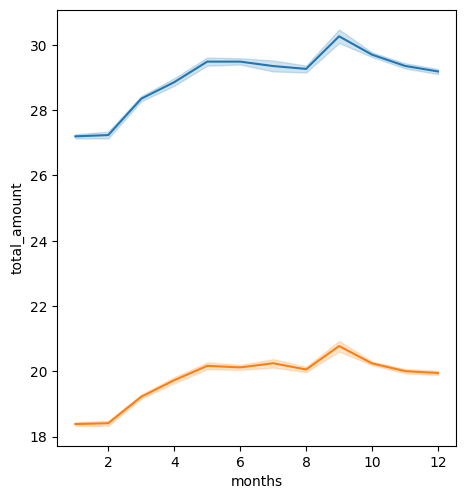

In [69]:
plt.figure(figsize=(7*1.618,3.5*1.618))
plt.subplot(1,2,1)
sns.lineplot(data=df,x='months',y='total_amount')
sns.lineplot(data=df,x='months',y='fare_amount')
plt.show()

In [70]:
df[df['fare_amount']==0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hours,days,months
487,2023-01-20 00:12:42,2023-01-20 00:23:29,1.0,0.07,2.0,N,148,79,2,0.0,...,0.5,0.0,0.0,1.0,5.25,2.5,-1.25,0.0,20.0,1.0
5581,2023-01-18 09:25:36,2023-01-18 09:30:58,1.0,0.00,1.0,N,193,193,2,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,9.0,18.0,1.0
11831,2023-01-22 13:06:22,2023-01-22 13:08:06,1.0,0.00,1.0,N,145,145,2,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,13.0,22.0,1.0
11929,2023-01-22 13:16:59,2023-01-22 13:17:19,1.0,0.00,1.0,N,145,145,2,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,13.0,22.0,1.0
12978,2023-01-23 14:21:04,2023-01-23 14:21:18,1.0,14.00,1.0,N,265,265,4,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,14.0,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872213,2023-09-05 13:17:40,2023-09-05 13:26:04,1.0,0.03,1.0,N,163,163,2,0.0,...,0.5,0.0,0.0,1.0,4.00,2.5,0.00,13.0,5.0,9.0
2875470,2023-09-04 15:06:16,2023-09-04 15:07:08,1.0,1.20,5.0,N,161,161,3,0.0,...,0.0,0.0,0.0,1.0,1.00,0.0,0.00,15.0,4.0,9.0
2879822,2023-09-25 17:36:41,2023-09-25 17:36:56,1.0,0.00,1.0,N,132,132,3,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,17.0,25.0,9.0
2883228,2023-09-25 19:04:07,2023-09-25 19:29:05,1.0,2.26,1.0,N,239,237,2,0.0,...,0.5,0.0,0.0,1.0,4.00,2.5,0.00,19.0,25.0,9.0


In [71]:
df[df['tip_amount']==0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hours,days,months
4,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,2,15.6,...,0.5,0.0,0.0,1.0,19.35,0.0,1.25,0.0,3.0,1.0
5,2023-01-17 00:46:57,2023-01-17 00:51:21,1.0,1.34,1.0,N,170,162,2,7.9,...,0.5,0.0,0.0,1.0,12.90,2.5,0.00,0.0,17.0,1.0
17,2023-01-08 00:04:26,2023-01-08 00:27:46,2.0,15.70,1.0,N,132,123,2,59.0,...,0.5,0.0,0.0,1.0,62.75,0.0,1.25,0.0,8.0,1.0
18,2023-01-09 00:54:18,2023-01-09 00:57:54,3.0,1.00,1.0,N,234,230,2,6.5,...,0.5,0.0,0.0,1.0,11.50,2.5,0.00,0.0,9.0,1.0
19,2023-01-15 00:01:07,2023-01-15 00:10:46,3.0,1.80,1.0,N,249,231,1,11.4,...,0.5,0.0,0.0,1.0,16.40,2.5,0.00,0.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889703,2023-09-09 23:06:20,2023-09-09 23:17:05,3.0,1.15,1.0,N,164,233,1,10.0,...,0.5,0.0,0.0,1.0,15.00,2.5,0.00,23.0,9.0,9.0
2889710,2023-09-09 23:34:08,2023-09-09 23:45:14,1.0,2.05,1.0,N,239,48,2,12.8,...,0.5,0.0,0.0,1.0,17.80,2.5,0.00,23.0,9.0,9.0
2889717,2023-09-16 23:00:59,2023-09-16 23:03:00,1.0,0.18,1.0,N,211,144,1,3.7,...,0.5,0.0,0.0,1.0,8.70,2.5,0.00,23.0,16.0,9.0
2889719,2023-09-28 23:18:19,2023-09-28 23:27:32,2.0,1.42,1.0,N,230,229,2,10.7,...,0.5,0.0,0.0,1.0,15.70,2.5,0.00,23.0,28.0,9.0


In [72]:
df[df['total_amount']==0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hours,days,months
5581,2023-01-18 09:25:36,2023-01-18 09:30:58,1.0,0.0,1.0,N,193,193,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,18.0,1.0
11831,2023-01-22 13:06:22,2023-01-22 13:08:06,1.0,0.0,1.0,N,145,145,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,22.0,1.0
11929,2023-01-22 13:16:59,2023-01-22 13:17:19,1.0,0.0,1.0,N,145,145,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,22.0,1.0
12978,2023-01-23 14:21:04,2023-01-23 14:21:18,1.0,14.0,1.0,N,265,265,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,23.0,1.0
13127,2023-01-19 14:07:52,2023-01-19 14:08:17,1.0,0.0,1.0,N,43,43,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811498,2023-05-11 13:00:10,2023-05-11 13:00:17,1.0,0.0,1.0,N,70,70,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,11.0,5.0
2841283,2023-07-16 11:25:18,2023-07-16 11:26:18,1.0,0.0,1.0,N,264,264,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,7.0
2850780,2023-07-04 17:51:41,2023-07-04 17:51:57,1.0,16.4,1.0,N,145,145,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,4.0,7.0
2879822,2023-09-25 17:36:41,2023-09-25 17:36:56,1.0,0.0,1.0,N,132,132,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,25.0,9.0


In [73]:
df[df['trip_distance']==0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hours,days,months
62,2023-01-03 00:23:10,2023-01-03 00:23:22,1.0,0.0,3.0,N,177,177,4,23.0,...,0.0,0.00,0.0,1.0,25.00,0.0,0.0,0.0,3.0,1.0
69,2023-01-30 00:03:58,2023-01-30 00:04:26,1.0,0.0,2.0,N,129,129,2,70.0,...,0.5,0.00,0.0,1.0,71.50,0.0,0.0,0.0,30.0,1.0
97,2023-01-18 00:18:54,2023-01-18 00:43:34,1.0,0.0,1.0,N,244,90,1,28.2,...,0.5,0.00,0.0,1.0,29.70,0.0,0.0,0.0,18.0,1.0
134,2023-01-16 00:53:10,2023-01-16 00:53:27,1.0,0.0,5.0,N,162,162,1,19.0,...,0.0,4.00,0.0,1.0,24.00,0.0,0.0,0.0,16.0,1.0
149,2023-01-28 00:47:53,2023-01-28 00:48:01,1.0,0.0,5.0,N,75,75,1,30.0,...,0.0,9.30,0.0,1.0,40.30,0.0,0.0,0.0,28.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889502,2023-09-08 23:31:50,2023-09-09 00:03:04,1.0,0.0,1.0,N,264,264,1,24.7,...,0.5,5.94,0.0,1.0,35.64,2.5,0.0,23.0,8.0,9.0
2889522,2023-09-16 23:56:47,2023-09-16 23:57:02,1.0,0.0,5.0,N,140,140,1,22.4,...,0.0,5.00,0.0,1.0,30.90,2.5,0.0,23.0,16.0,9.0
2889544,2023-09-02 23:15:25,2023-09-02 23:15:25,4.0,0.0,1.0,N,144,264,2,3.0,...,0.5,0.00,0.0,1.0,8.00,2.5,0.0,23.0,2.0,9.0
2889564,2023-09-29 23:38:15,2023-09-29 23:50:26,1.0,0.0,1.0,N,211,113,1,11.4,...,0.5,2.46,0.0,1.0,18.86,2.5,0.0,23.0,29.0,9.0


### there are data in  `tip_amount`, `total_amount`, `fare_amount` and `trip_distance` containing zeros but not negative value

### i think we should leave them where there are because analysing the data without them might give a result not representative of the reality about these data 

<Axes: xlabel='months'>

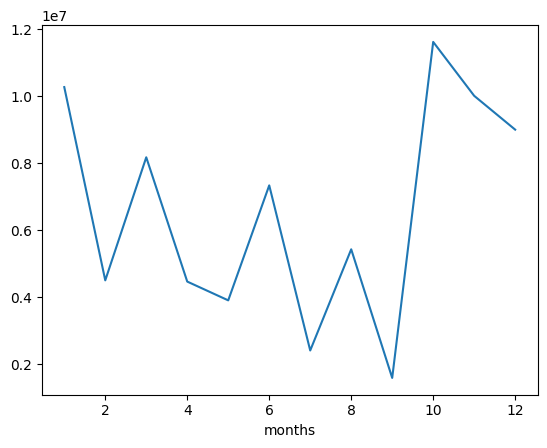

In [74]:
df.groupby('months')['total_amount'].sum().plot()

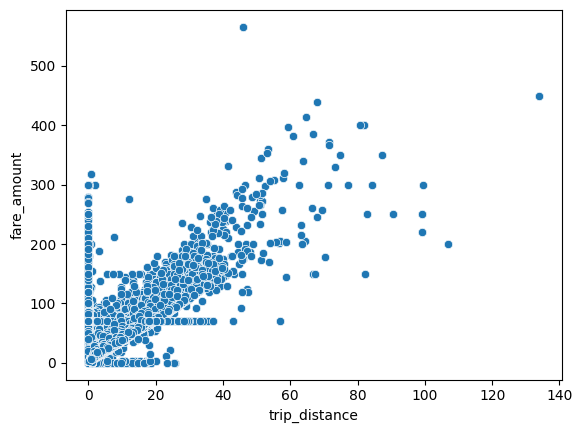

In [ ]:
sns.scatterplot(data=df,x='trip_distance',y='fare_amount')
plt.show()

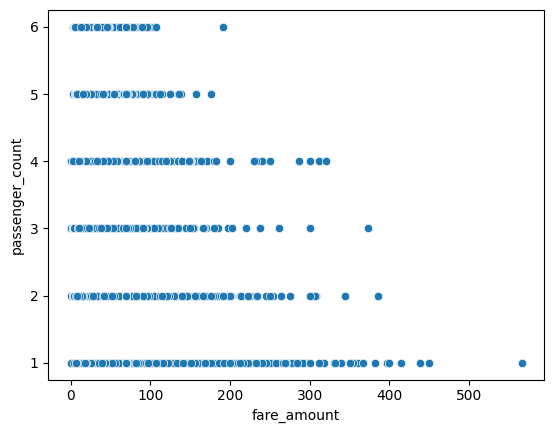

In [191]:
sns.scatterplot(data=df,x='fare_amount',y='passenger_count')
plt.show()

In [79]:
df['trip_distance'].corr(df['fare_amount'])

0.912892203507501

In [88]:
df.columns.difference(['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

Index(['DOLocationID', 'PULocationID', 'RatecodeID', 'airport_fee',
       'congestion_surcharge', 'days', 'extra', 'fare_amount', 'hours',
       'improvement_surcharge', 'months', 'mta_tax', 'passenger_count',
       'payment_type', 'store_and_fwd_flag', 'tip_amount', 'tolls_amount',
       'total_amount', 'trip_distance'],
      dtype='object')

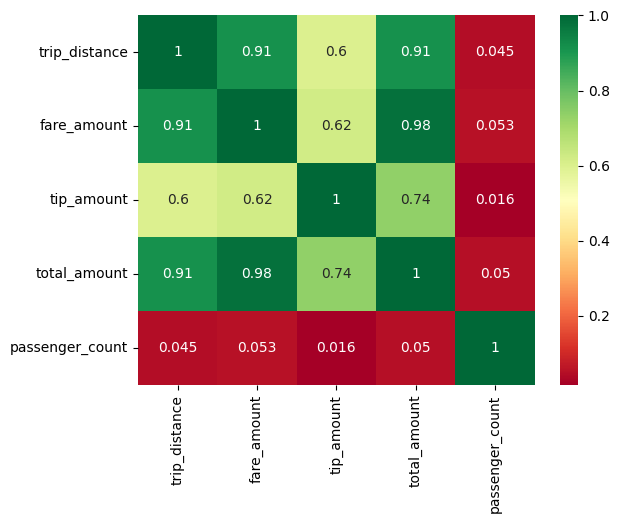

In [93]:
sns.heatmap(df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount','passenger_count']].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [95]:
df['payment_type'].value_counts()

payment_type
1    2274021
2     464570
4      21052
3      12308
Name: count, dtype: int64

In [96]:
df['payment_type']=df['payment_type'].apply(lambda x: 'Credit card' if x==1 else 'Cash' if x==2 else 'No charge' if x==3 else 'Dispute' if x==4 else 'Unknown' )

In [97]:
df['payment_type'].value_counts()

payment_type
Credit card    2274021
Cash            464570
Dispute          21052
No charge        12308
Name: count, dtype: int64

<Axes: xlabel='payment_type'>

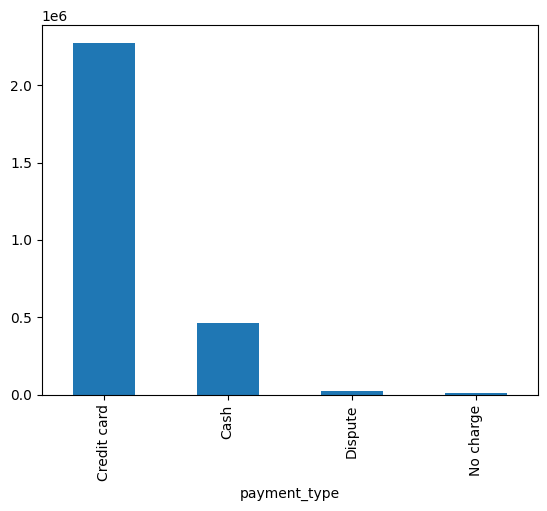

In [100]:
df['payment_type'].value_counts().plot(kind='bar')

In [111]:
os.chdir('C:/Users/rakim\Downloads/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rakim\AppData\Local\Temp\ipykernel_22964\2197551288.py:1: SyntaxWarning: invalid escape sequence '\D'
  os.chdir('C:/Users/rakim\Downloads/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones')


In [115]:
import geopandas as gpd 
zone=gpd.read_file('taxi_zones.shp')
zone.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [116]:
zone.shape

(263, 7)

In [117]:
zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


<Axes: >

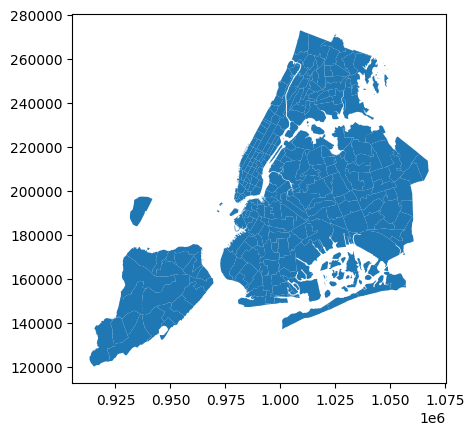

In [118]:
zone.plot()

In [127]:
data= pd.merge(df, zone, left_on='PULocationID', right_on='LocationID', how='left')
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,hours,days,months,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2023-01-10 00:44:09,2023-01-10 00:51:23,1.0,1.97,1.0,N,142,164,Credit card,10.7,...,0.0,10.0,1.0,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
1,2023-01-15 00:32:10,2023-01-15 00:42:27,1.0,1.50,1.0,N,113,79,Credit card,10.0,...,0.0,15.0,1.0,113.0,0.032745,0.000058,Greenwich Village North,113.0,Manhattan,"POLYGON ((986643.64 204346.324, 986592.535 204..."
2,2023-01-29 00:29:35,2023-01-29 00:42:50,2.0,2.60,1.0,N,263,143,Credit card,15.6,...,0.0,29.0,1.0,263.0,0.037017,0.000066,Yorkville West,263.0,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22..."
3,2023-01-14 00:14:30,2023-01-14 00:27:04,1.0,1.79,1.0,N,79,158,Credit card,13.5,...,0.0,14.0,1.0,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,Cash,15.6,...,0.0,3.0,1.0,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."


In [166]:
data['count_trip']=data['LocationID'].map(data['LocationID'].value_counts())
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,payment_type_y,payment_type,count_trip
0,2023-01-10 00:44:09,2023-01-10 00:51:23,1.0,1.97,1.0,N,142,164,Credit card,10.7,...,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",90546.0,90546.0,90546.0
1,2023-01-15 00:32:10,2023-01-15 00:42:27,1.0,1.50,1.0,N,113,79,Credit card,10.0,...,113.0,0.032745,0.000058,Greenwich Village North,113.0,Manhattan,"POLYGON ((986643.64 204346.324, 986592.535 204...",36923.0,36923.0,36923.0
2,2023-01-29 00:29:35,2023-01-29 00:42:50,2.0,2.60,1.0,N,263,143,Credit card,15.6,...,263.0,0.037017,0.000066,Yorkville West,263.0,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",52348.0,52348.0,52348.0
3,2023-01-14 00:14:30,2023-01-14 00:27:04,1.0,1.79,1.0,N,79,158,Credit card,13.5,...,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...",64286.0,64286.0,64286.0
4,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,Cash,15.6,...,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",144047.0,144047.0,144047.0


In [177]:
zone2=data.loc[:,['OBJECTID','Shape_Leng','Shape_Area','zone','LocationID','borough','geometry','count_trip']]
zone2.head()




,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,count_trip
0,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",90546.0
1,113.0,0.032745,0.000058,Greenwich Village North,113.0,Manhattan,"POLYGON ((986643.64 204346.324, 986592.535 204...",36923.0
2,263.0,0.037017,0.000066,Yorkville West,263.0,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",52348.0
3,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...",64286.0
4,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",144047.0


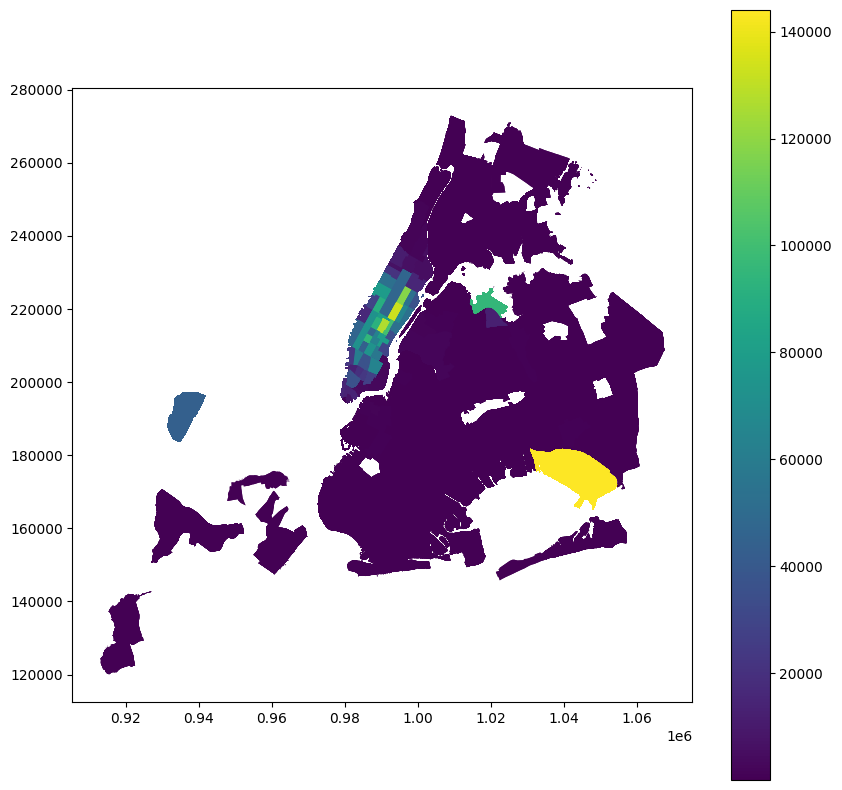

In [182]:
fig,ax = plt.subplots(1,1, figsize=(10,10)) 
zone2.plot(column='count_trip', legend=True, ax=ax)
plt.show()

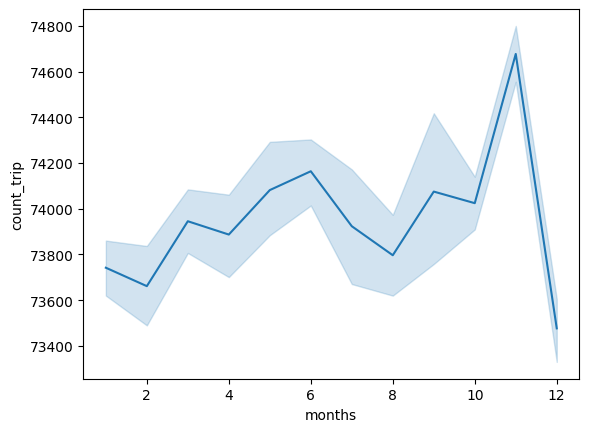

In [189]:
sns.lineplot(data=data, x='months', y='count_trip')
plt.show()

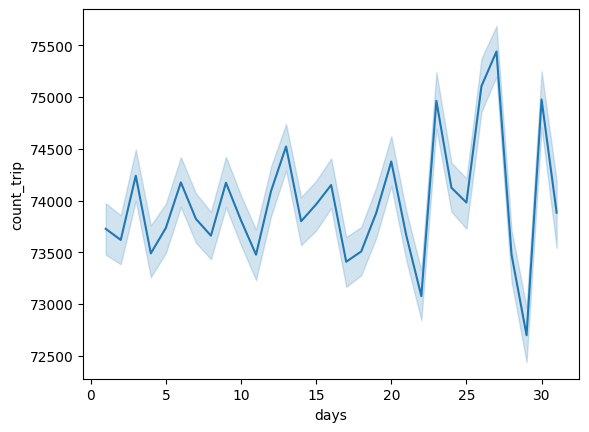

In [186]:
sns.lineplot(data=data, x='days', y='count_trip')
plt.show()

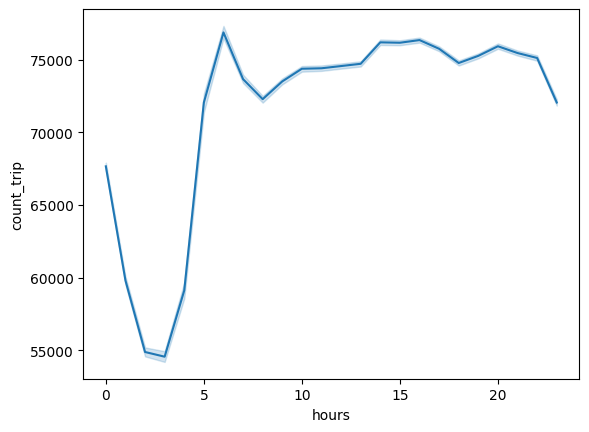

In [187]:
sns.lineplot(data=data, x='hours', y='count_trip')
plt.show()

<Axes: xlabel='passenger_count'>

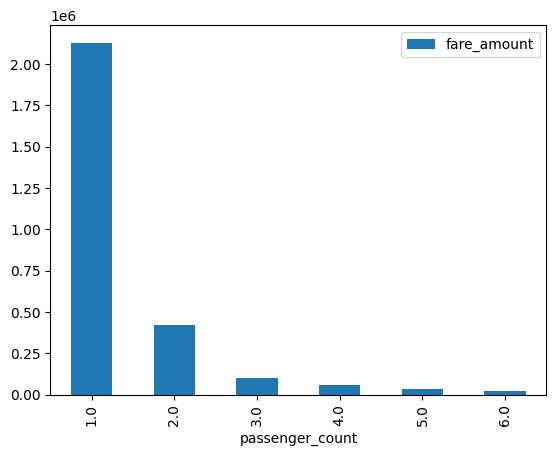

In [194]:
data.groupby('passenger_count').agg({'fare_amount':'count'}).plot(kind='bar')

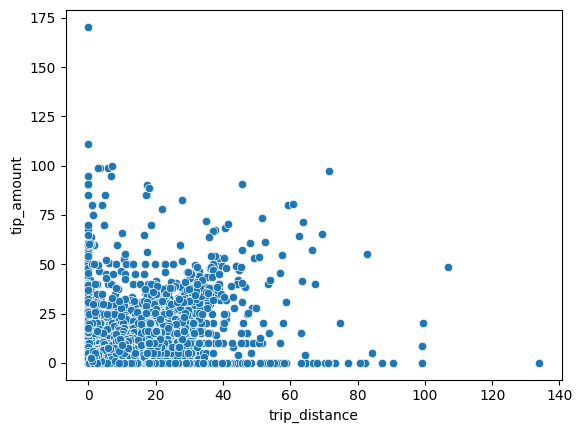

In [195]:
sns.scatterplot(data=data,x='trip_distance',y='tip_amount')
plt.show()

In [203]:
data.groupby('hours').count()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,payment_type_y,payment_type,count_trip
hours,,,,,,,,,,,,,,,,,,,,,
0.0,76226,76226,76226,76226,76226,76226,76226,76226,76226,76226,...,75345,75345,75345,75345,75345,75345,75345,75345,75345,75345
1.0,51344,51344,51344,51344,51344,51344,51344,51344,51344,51344,...,50747,50747,50747,50747,50747,50747,50747,50747,50747,50747
2.0,33626,33626,33626,33626,33626,33626,33626,33626,33626,33626,...,33219,33219,33219,33219,33219,33219,33219,33219,33219,33219
3.0,22194,22194,22194,22194,22194,22194,22194,22194,22194,22194,...,21871,21871,21871,21871,21871,21871,21871,21871,21871,21871
4.0,14210,14210,14210,14210,14210,14210,14210,14210,14210,14210,...,14073,14073,14073,14073,14073,14073,14073,14073,14073,14073
5.0,14720,14720,14720,14720,14720,14720,14720,14720,14720,14720,...,14526,14526,14526,14526,14526,14526,14526,14526,14526,14526
6.0,35153,35153,35153,35153,35153,35153,35153,35153,35153,35153,...,34800,34800,34800,34800,34800,34800,34800,34800,34800,34800
7.0,71943,71943,71943,71943,71943,71943,71943,71943,71943,71943,...,71270,71270,71270,71270,71270,71270,71270,71270,71270,71270
8.0,100362,100362,100362,100362,100362,100362,100362,100362,100362,100362,...,99332,99332,99332,99332,99332,99332,99332,99332,99332,99332


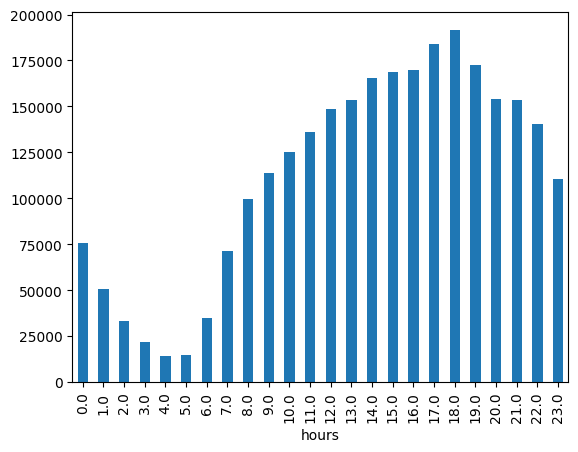

In [206]:
data.groupby('hours')['count_trip'].count().plot(kind='bar')
plt.show()

In [209]:
data.groupby('hours')['count_trip'].count().nlargest(5)

hours
18.0    191645
17.0    183770
19.0    172298
16.0    169665
15.0    168813
Name: count_trip, dtype: int64

In [210]:
data.groupby('hours')['count_trip'].count().nlargest(5).sum()

886191

<Axes: xlabel='days'>

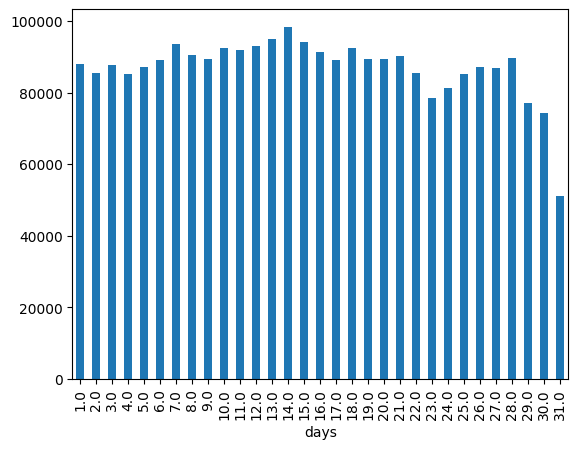

In [212]:
data.groupby('days')['count_trip'].count().plot(kind='bar')

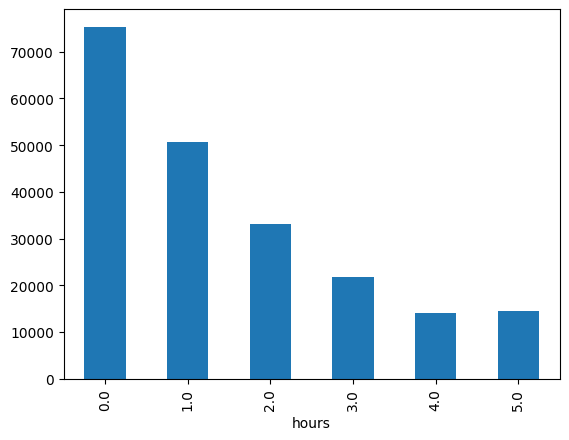

In [217]:
data[data['hours']<=5].groupby('hours')['count_trip'].count().plot(kind='bar')
plt.show()

In [220]:
data[data['hours']<=5].groupby('hours')['total_amount'].count()


hours
0.0    76226
1.0    51344
2.0    33626
3.0    22194
4.0    14210
5.0    14720
Name: total_amount, dtype: int64

In [221]:
data[data['hours']<=5].groupby('hours')['total_amount'].count().sum()


212320

In [224]:
data[(data['hours']>5) & (data['hours']<=11)].groupby('hours')['total_amount'].count()


hours
6.0      35153
7.0      71943
8.0     100362
9.0     114924
10.0    126237
11.0    137364
Name: total_amount, dtype: int64

In [223]:
data[(data['hours']>5) & (data['hours']<=11)].groupby('hours')['total_amount'].count().sum()


585983

In [248]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hours,days,months
0,2023-01-10 00:44:09,2023-01-10 00:51:23,1.0,1.97,1.0,N,142,164,Credit card,10.7,...,0.5,3.14,0.0,1.0,18.84,2.5,0.00,0.0,10.0,1.0
1,2023-01-15 00:32:10,2023-01-15 00:42:27,1.0,1.50,1.0,N,113,79,Credit card,10.0,...,0.5,2.00,0.0,1.0,17.00,2.5,0.00,0.0,15.0,1.0
2,2023-01-29 00:29:35,2023-01-29 00:42:50,2.0,2.60,1.0,N,263,143,Credit card,15.6,...,0.5,4.10,0.0,1.0,24.70,2.5,0.00,0.0,29.0,1.0
3,2023-01-14 00:14:30,2023-01-14 00:27:04,1.0,1.79,1.0,N,79,158,Credit card,13.5,...,0.5,1.48,0.0,1.0,19.98,2.5,0.00,0.0,14.0,1.0
4,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,Cash,15.6,...,0.5,0.00,0.0,1.0,19.35,0.0,1.25,0.0,3.0,1.0


In [246]:
import math


data['fare_per_mile']=data['trip_distance'].apply(lambda x: math.floor(x*1))
data['fare_per_mile']=data['fare_per_mile']*data['passenger_count']

data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,Shape_Area,zone,LocationID,borough,geometry,payment_type_y,payment_type,count_trip,total_fare_per_mile,fare_per_mile
0,2023-01-10 00:44:09,2023-01-10 00:51:23,1.0,1.97,1.0,N,142,164,Credit card,10.7,...,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",90546.0,90546.0,90546.0,1.0,1.0
1,2023-01-15 00:32:10,2023-01-15 00:42:27,1.0,1.50,1.0,N,113,79,Credit card,10.0,...,0.000058,Greenwich Village North,113.0,Manhattan,"POLYGON ((986643.64 204346.324, 986592.535 204...",36923.0,36923.0,36923.0,1.0,1.0
2,2023-01-29 00:29:35,2023-01-29 00:42:50,2.0,2.60,1.0,N,263,143,Credit card,15.6,...,0.000066,Yorkville West,263.0,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",52348.0,52348.0,52348.0,4.0,4.0
3,2023-01-14 00:14:30,2023-01-14 00:27:04,1.0,1.79,1.0,N,79,158,Credit card,13.5,...,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...",64286.0,64286.0,64286.0,1.0,1.0
4,2023-01-03 00:55:05,2023-01-03 01:03:28,1.0,3.34,1.0,N,132,132,Cash,15.6,...,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",144047.0,144047.0,144047.0,3.0,3.0


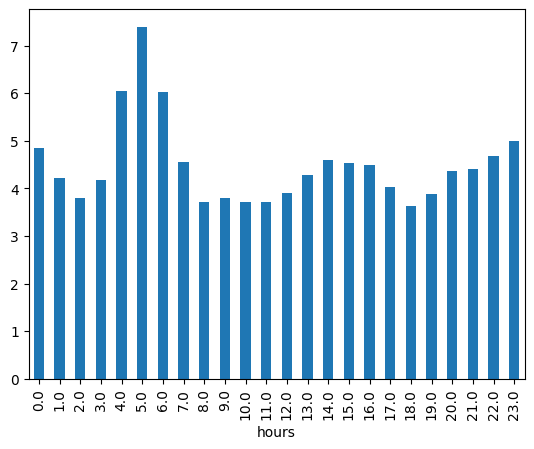

In [254]:
data.groupby('hours')['fare_per_mile'].mean().plot(kind='bar')
plt.show()

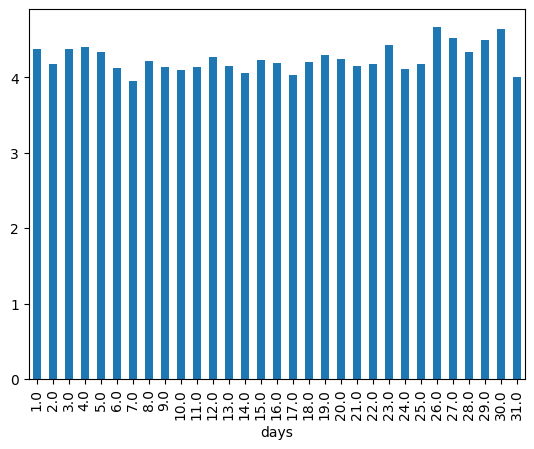

In [255]:
data.groupby('days')['fare_per_mile'].mean().plot(kind='bar')
plt.show()

In [265]:
data['tip_percentage']=data['tip_amount']/data['tip_amount'].sum()*100


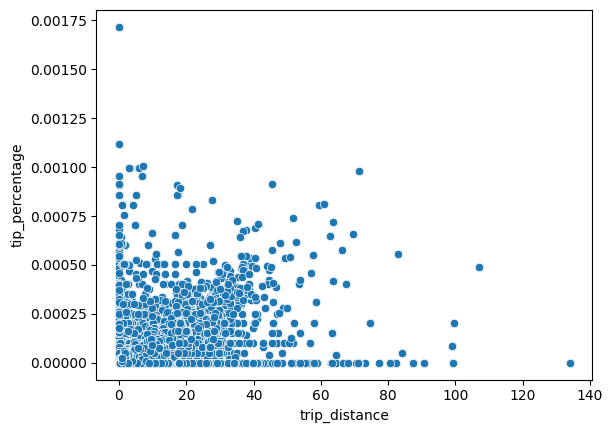

In [266]:
sns.scatterplot(data=data,x='trip_distance',y='tip_percentage')
plt.show()

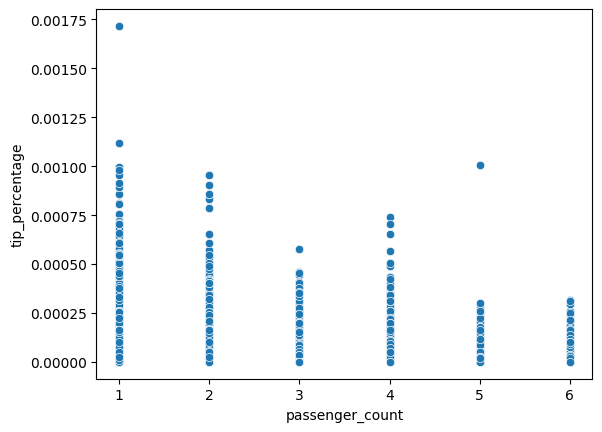

In [267]:
sns.scatterplot(data=data,x='passenger_count',y='tip_percentage')
plt.show()

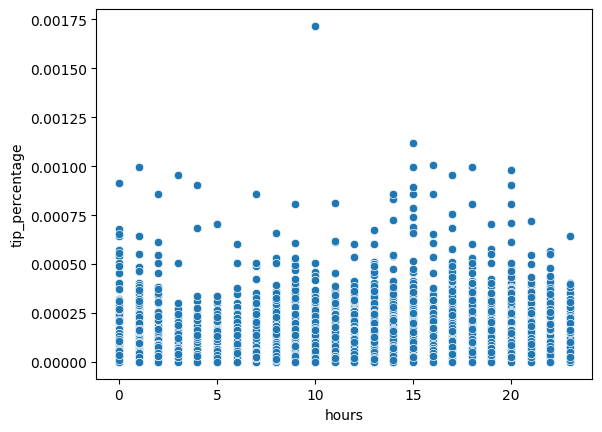

In [268]:
sns.scatterplot(data=data,x='hours',y='tip_percentage')
plt.show()

In [275]:
data['tip_percentage'].describe()

count    2.772063e+06
mean     3.607422e-05
std      4.080770e-05
min      0.000000e+00
25%      1.007075e-05
50%      2.870165e-05
75%      4.481485e-05
max      1.716963e-03
Name: tip_percentage, dtype: float64

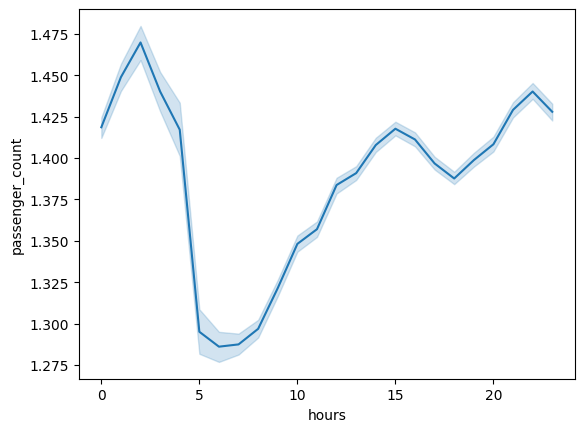

In [276]:
sns.lineplot(data=data,x='hours',y='passenger_count')
plt.show()


<Axes: xlabel='hours'>

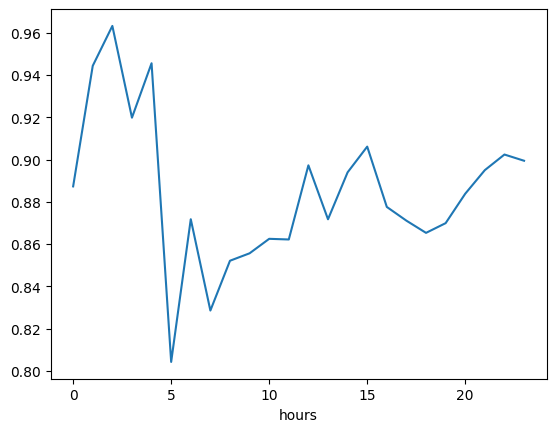

In [279]:
data.groupby('hours')['passenger_count'].std().plot()

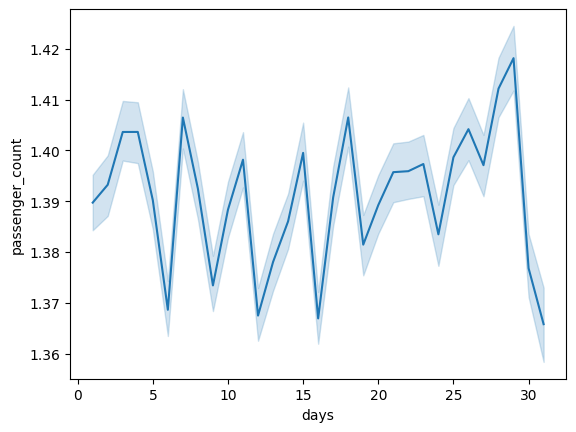

In [280]:
sns.lineplot(data=data,x='days',y='passenger_count')
plt.show()


<Axes: xlabel='days'>

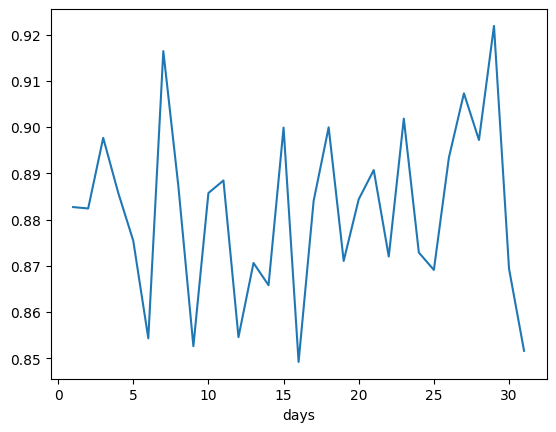

In [281]:
data.groupby('days')['passenger_count'].std().plot()

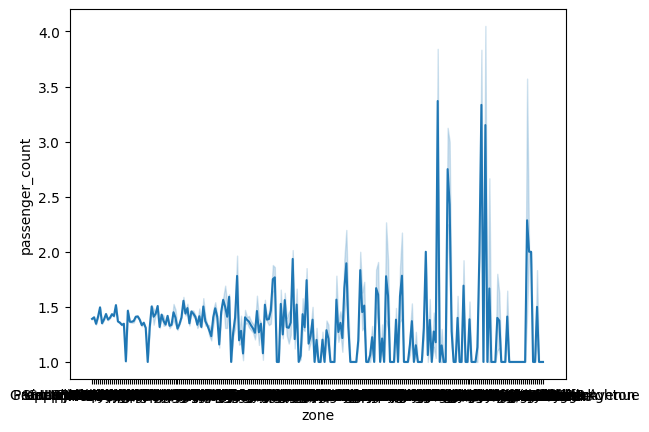

In [282]:
sns.lineplot(data=data,x='zone',y='passenger_count')
plt.show()
